In [52]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx
import matplotlib.pyplot as plt
import mapclassify as mc
import matplotlib.patches as mpatches
import libpysal as ps
import esda
import matplotlib.pyplot as plt

In [10]:
# loading cleaning csv
df = pd.read_csv("data/listings.csv")

# create GeoDataFrame the geographic coordinate reference system is WGS84 (EPSG:4326)
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# save as a Parquet file
geo_df.to_parquet("airbnb_listings_wgs84.parquet", index=False)

In [15]:
# Shapefile to parquet file 
shp_path = "london_poi_all/london-latest.shp"
gdf = gpd.read_file(shp_path)


# save as Parquet file
output_parquet_path = "london_latest_tourism.parquet"
gdf.to_parquet(output_parquet_path, index=False)

print(f"file is: {output_parquet_path}")

file is: london_latest_tourism.parquet


In [17]:
ddir = os.path.join('data')
file_path = os.path.join(ddir, 'greater_london.gpkg')  #full path

# loading GPKG
msoa_boundaries = gpd.read_file(file_path)

print("MSOA is loading.")
print(msoa_boundaries.head())

MSOA is loading.
    geo_code                 geo_label geo_labelw  \
0  E02000730                Newham 017       None   
1  E02000053                Barnet 030       None   
2  E02000243                Ealing 006       None   
3  E02000793  Richmond upon Thames 010       None   
4  E02000077                Bexley 013       None   

                                            geometry  
0  MULTIPOLYGON (((540612.745 184312.782, 540611....  
1  MULTIPOLYGON (((521244.462 190052.504, 521255....  
2  MULTIPOLYGON (((513445.352 183679.664, 513446....  
3  MULTIPOLYGON (((513496.024 174051.923, 513495....  
4  MULTIPOLYGON (((546675.313 176656.042, 546675....  


In [28]:
print(msoa_boundaries.crs)

EPSG:27700


In [18]:
airbnb = pd.read_parquet("airbnb_listings_wgs84.parquet")
print(airbnb.head())

       id                                               name  host_id  \
0  116268  Double Room (Unavailable for check in 31Dec-1Jan)   586671   
1  117203            A stylish Victorian home in West London   255103   
2  127652                    Contemporary central London apt   134938   
3  127860  Double bedroom in cottage Twickenham (sleeps 1-2)   161720   
4  131444                         Apartment close to centre.   646165   

  host_name  neighbourhood_group           neighbourhood   latitude  \
0       Joe                  NaN                 Enfield  51.611370   
1      Olga                  NaN  Hammersmith and Fulham  51.501550   
2       Ron                  NaN                  Camden  51.559528   
3      Andy                  NaN    Richmond upon Thames  51.447770   
4  Yevgeniy                  NaN                 Lambeth  51.491476   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -0.118880     Private room   40.0               7       

In [19]:
londonpoi_t = pd.read_parquet("london_latest_tourism.parquet")
print(londonpoi_t.head())

            id                name     category subcategor       lon  \
0  node/107557  Rotherhithe Tunnel    TRANSPORT    BUSSTOP -0.054434   
1  node/107775              London  SETTLEMENTS       CITY -0.127647   
2  node/108289   Buckingham Palace    TRANSPORT    BUSSTOP -0.142765   
3  node/108539     Windsor Terrace         SHOP    BICYCLE -0.093388   
4  node/108837    Monument Station    TRANSPORT    BUSSTOP -0.087090   

         lat  srid                                   wkt  city image  ...  \
0  51.499534  4326  POINT (-0.0544337 51.49953420000001)  None  None  ...   
1  51.507322  4326         POINT (-0.1276474 51.5073219)  None  None  ...   
2  51.499491  4326         POINT (-0.1427649 51.4994913)  None  None  ...   
3  51.529125  4326         POINT (-0.0933878 51.5291251)  None  None  ...   
4  51.509465  4326         POINT (-0.0870901 51.5094651)  None  None  ...   

  housenumbe   fax                  descriptio country operator  tags brand  \
0       None  None       

In [ ]:
这步先不用

In [71]:
# Shapefile to parquet file 
shp_path = "data/pois/gis_osm_pois_free_1.shp"  # 修改为实际路径
hgdf = gpd.read_file(shp_path)
print(hgdf.head())

   osm_id  code          fclass                name                   geometry
0   99884  2906    waste_basket                None  POINT (-0.15282 51.52436)
1  108539  2566  bicycle_rental     Windsor Terrace  POINT (-0.09339 51.52913)
2  388826  2701    tourist_info                None  POINT (-0.15582 51.53042)
3  451152  2304             pub     King of Prussia  POINT (-0.19461 51.60084)
4  451153  2301      restaurant  Central Restaurant   POINT (-0.1935 51.60203)


In [72]:
hotels = hgdf[hgdf['fclass'] == 'hotel']
print(hotels.head())

output_path = "hotels_data.parquet"
hotels.to_parquet(output_path, index=False)

print(f"File has been saved to {output_path}")

         osm_id  code fclass                                             name  \
216    29372721  2401  hotel          Sundridge Park hotel and conference Ctr   
315    31314241  2401  hotel  DoubleTree by Hilton Hotel London - Marble Arch   
674    59931333  2401  hotel                               easyHotel Victoria   
1331  254025974  2401  hotel                                 Crestfield Hotel   
1332  254025975  2401  hotel                            Kings Cross Inn Hotel   

                       geometry  
216    POINT (0.03723 51.41703)  
315   POINT (-0.15664 51.51457)  
674     POINT (-0.142 51.49199)  
1331  POINT (-0.12241 51.52976)  
1332  POINT (-0.12294 51.53026)  
File has been saved to hotels_data.parquet


In [89]:
hotels_gdf = gpd.read_parquet("hotels_data.parquet")
print(hotels_gdf.head())
print("Coordinate Reference System (CRS):", hotels_gdf.crs)
print(hotels_gdf.info())

      osm_id  code fclass                                             name  \
0   29372721  2401  hotel          Sundridge Park hotel and conference Ctr   
1   31314241  2401  hotel  DoubleTree by Hilton Hotel London - Marble Arch   
2   59931333  2401  hotel                               easyHotel Victoria   
3  254025974  2401  hotel                                 Crestfield Hotel   
4  254025975  2401  hotel                            Kings Cross Inn Hotel   

                    geometry  
0   POINT (0.03723 51.41703)  
1  POINT (-0.15664 51.51457)  
2    POINT (-0.142 51.49199)  
3  POINT (-0.12241 51.52976)  
4  POINT (-0.12294 51.53026)  
Coordinate Reference System (CRS): {"$schema": "https://proj.org/schemas/v0.7/projjson.schema.json", "type": "GeographicCRS", "name": "WGS 84", "datum_ensemble": {"name": "World Geodetic System 1984 ensemble", "members": [{"name": "World Geodetic System 1984 (Transit)"}, {"name": "World Geodetic System 1984 (G730)"}, {"name": "World Geodetic S

In [90]:
print("Number of rows:", hotels_gdf.shape[0])

Number of rows: 331


In [85]:
#可能不需要

londonpoi_t_gdf = gpd.GeoDataFrame(londonpoi_t, 
                                  geometry=gpd.points_from_xy(londonpoi_t['lon'], londonpoi_t['lat']), 
                                  crs="EPSG:4326")

airbnb_gdf = gpd.GeoDataFrame(airbnb, 
                              geometry=gpd.points_from_xy(airbnb['longitude'], airbnb['latitude']), 
                              crs="EPSG:4326")

In [87]:
londonacc_t_gdf = londonpoi_t_gdf[londonpoi_t_gdf['category'] == 'ACCOMMODATION']
print(londonacc_t_gdf.head())

                id                                             name  \
295  node/25947730                                          Novotel   
308  node/26197001                                     Crowne Plaza   
549  node/29372721          Sundridge Park hotel and conference Ctr   
608  node/31314241  DoubleTree by Hilton Hotel London - Marble Arch   
864  node/59931333                               easyHotel Victoria   

          category subcategor       lon        lat  srid  \
295  ACCOMMODATION      HOTEL -0.455853  51.497544  4326   
308  ACCOMMODATION      HOTEL -0.454210  51.499441  4326   
549  ACCOMMODATION      HOTEL  0.037226  51.417030  4326   
608  ACCOMMODATION      HOTEL -0.156638  51.514571  4326   
864  ACCOMMODATION      HOTEL -0.142005  51.491988  4326   

                                       wkt    city image  ... housenumbe  \
295          POINT (-0.4558534 51.4975442)    None  None  ...       None   
308          POINT (-0.4542096 51.4994407)    None  None  ..

In [103]:
unique_subcategories = londonacc_t_gdf['subcategor'].unique()
print("Unique subcategories:", unique_subcategories)

subcategory_counts = londonacc_t_gdf['subcategor'].value_counts()
print("\nSubcategory counts:")
print(subcategory_counts)

Unique subcategories: ['HOTEL' 'GUESTHOUSE' 'MOTEL' 'HOSTEL' 'CAMPING' 'CARAVAN']

Subcategory counts:
subcategor
HOTEL         1387
HOSTEL         115
GUESTHOUSE      62
CAMPING         16
CARAVAN          7
MOTEL            2
Name: count, dtype: int64


In [110]:
london_hotel_gdf = londonacc_t_gdf[londonacc_t_gdf['subcategor'] == 'HOTEL']
print(london_hotel_gdf.head())

output_path = "hotel_point.parquet"
london_hotel_gdf.to_parquet(output_path, index=False)

print(f"File has been saved to {output_path}")

                id                                             name  \
295  node/25947730                                          Novotel   
308  node/26197001                                     Crowne Plaza   
549  node/29372721          Sundridge Park hotel and conference Ctr   
608  node/31314241  DoubleTree by Hilton Hotel London - Marble Arch   
864  node/59931333                               easyHotel Victoria   

          category subcategor       lon        lat  srid  \
295  ACCOMMODATION      HOTEL -0.455853  51.497544  4326   
308  ACCOMMODATION      HOTEL -0.454210  51.499441  4326   
549  ACCOMMODATION      HOTEL  0.037226  51.417030  4326   
608  ACCOMMODATION      HOTEL -0.156638  51.514571  4326   
864  ACCOMMODATION      HOTEL -0.142005  51.491988  4326   

                                       wkt    city image  ... housenumbe  \
295          POINT (-0.4558534 51.4975442)    None  None  ...       None   
308          POINT (-0.4542096 51.4994407)    None  None  ..

In [106]:
# 原始统计
print("Total count of 'HOTEL' in subcategor:", londonacc_t_gdf['subcategor'].value_counts()['HOTEL'])

# 筛选后的行数
london_hotel_gdf = londonacc_t_gdf[londonacc_t_gdf['subcategor'] == 'HOTEL']
print("Number of rows after filtering:", len(london_hotel_gdf))

Total count of 'HOTEL' in subcategor: 1387
Number of rows after filtering: 1387


In [111]:
hotel_gdf = gpd.read_parquet("hotel_point.parquet")
print(hotelgdf.head())
print("Coordinate Reference System (CRS):", hotel_gdf.crs)
print("Number of rows (using len):", len(hotel_gdf))

      osm_id  code fclass                                             name  \
0   29372721  2401  hotel          Sundridge Park hotel and conference Ctr   
1   31314241  2401  hotel  DoubleTree by Hilton Hotel London - Marble Arch   
2   59931333  2401  hotel                               easyHotel Victoria   
3  254025974  2401  hotel                                 Crestfield Hotel   
4  254025975  2401  hotel                            Kings Cross Inn Hotel   

                    geometry  
0   POINT (0.03723 51.41703)  
1  POINT (-0.15664 51.51457)  
2    POINT (-0.142 51.49199)  
3  POINT (-0.12241 51.52976)  
4  POINT (-0.12294 51.53026)  
Coordinate Reference System (CRS): {"$schema": "https://proj.org/schemas/v0.7/projjson.schema.json", "type": "GeographicCRS", "name": "WGS 84", "datum_ensemble": {"name": "World Geodetic System 1984 ensemble", "members": [{"name": "World Geodetic System 1984 (Transit)"}, {"name": "World Geodetic System 1984 (G730)"}, {"name": "World Geodetic S

In [96]:
airbnb_gdf = gpd.read_parquet("airbnb_listings_wgs84.parquet")
print(airbnb_gdf.head())
print("Coordinate Reference System (CRS):", airbnb_gdf.crs)

       id                                               name  host_id  \
0  116268  Double Room (Unavailable for check in 31Dec-1Jan)   586671   
1  117203            A stylish Victorian home in West London   255103   
2  127652                    Contemporary central London apt   134938   
3  127860  Double bedroom in cottage Twickenham (sleeps 1-2)   161720   
4  131444                         Apartment close to centre.   646165   

  host_name  neighbourhood_group           neighbourhood   latitude  \
0       Joe                  NaN                 Enfield  51.611370   
1      Olga                  NaN  Hammersmith and Fulham  51.501550   
2       Ron                  NaN                  Camden  51.559528   
3      Andy                  NaN    Richmond upon Thames  51.447770   
4  Yevgeniy                  NaN                 Lambeth  51.491476   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -0.118880     Private room   40.0               7       

In [ ]:
把点改成投影坐标系

In [26]:
londonpoi_t_gdf = londonpoi_t_gdf.to_crs('epsg:27700') # There is no 'in_place=True' option here.
print(londonpoi_t_gdf.geometry.crs)
print(londonpoi_t_gdf.total_bounds)

epsg:27700
[503571.6272128  155453.34555852 562492.18294736 200895.34894307]


In [27]:
airbnb_gdf = airbnb_gdf.to_crs('epsg:27700') # There is no 'in_place=True' option here.
print(airbnb_gdf.geometry.crs)
print(airbnb_gdf.total_bounds)

epsg:27700
[504110.58907151 156900.42075072 559262.78761517 199928.53721747]


In [112]:
hotel_gdf = hotel_gdf.to_crs('epsg:27700') # There is no 'in_place=True' option here.
print(hotel_gdf.geometry.crs)
print(hotel_gdf.total_bounds)

epsg:27700
[503571.6272128  161799.45000483 555121.55250209 199244.93339842]


/tmp/ipykernel_30959/237314528.py:11: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


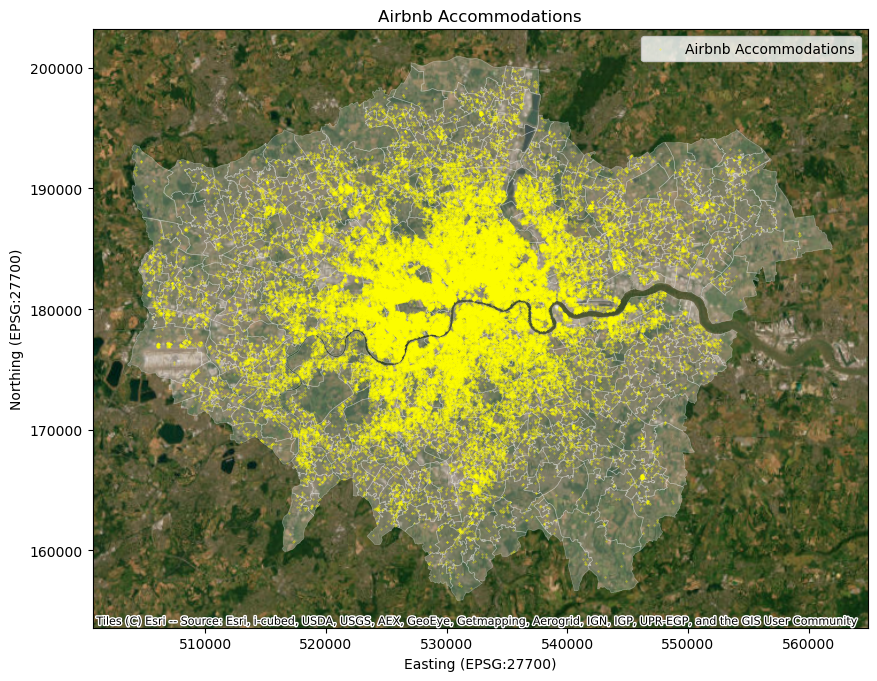

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))

# msoa boundry
msoa_boundaries.plot(ax=ax, color='lightgrey', edgecolor='white',alpha=0.3, linewidth=0.5, label="MSOA Boundaries")

#  Airbnb points
airbnb_gdf.plot(ax=ax, markersize=0.1, color='yellow', alpha=0.7, label="Airbnb Accommodations")
# base map 
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery, crs=msoa_boundaries.crs)
# 
plt.legend()
plt.title("Airbnb Accommodations")
plt.xlabel("Easting (EPSG:27700)")
plt.ylabel("Northing (EPSG:27700)")

# 
plt.show()

In [116]:
print(len(hotel_gdf))

1387


/tmp/ipykernel_30959/2084313332.py:11: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


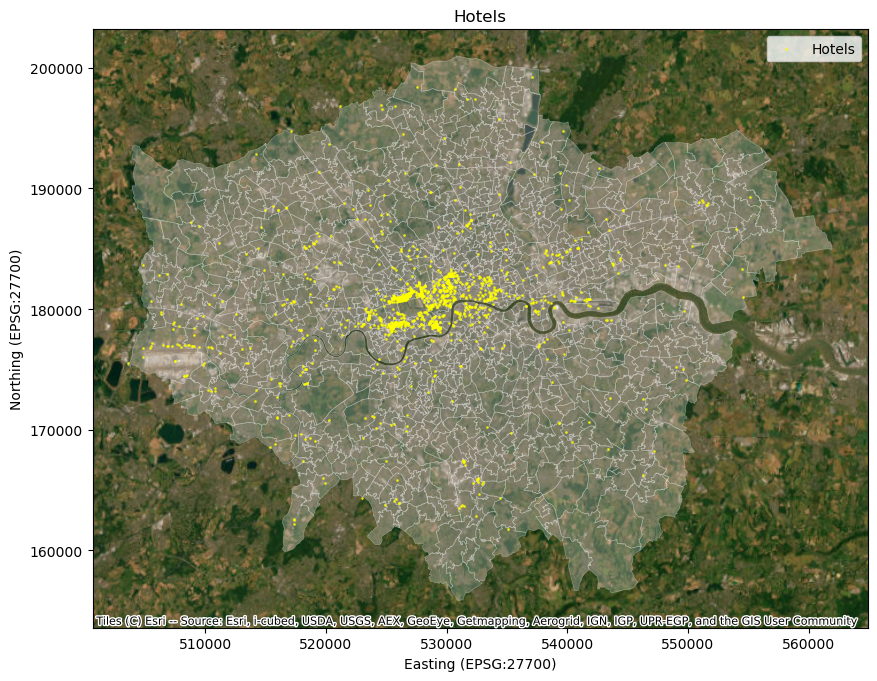

In [113]:
fig, ax = plt.subplots(figsize=(10, 10))

# msoa boundry
msoa_boundaries.plot(ax=ax, color='lightgrey', edgecolor='white',alpha=0.3, linewidth=0.5, label="MSOA Boundaries")

#  Airbnb points
hotel_gdf.plot(ax=ax, markersize=1, color='yellow', alpha=0.7, label="Hotels")
# base map 
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery, crs=msoa_boundaries.crs)
# 
plt.legend()
plt.title("Hotels")
plt.xlabel("Easting (EPSG:27700)")
plt.ylabel("Northing (EPSG:27700)")

# 
plt.show()

In [43]:
# using spatial join to link Airbnb points to MSOA regions
airbnb_with_msoa = gpd.sjoin(airbnb_gdf, msoa_boundaries, how="inner", predicate='within')

# Counting the number of Airbnb points in each MSOA area
airbnb_count = airbnb_with_msoa.groupby('geo_code').size().reset_index(name='airbnb_count')

msoa_boundaries['area_m2'] = msoa_boundaries.geometry.area
# merge data
msoa_with_airbnb = msoa_boundaries.merge(airbnb_count, on='geo_code', how='left')

#nan=0
msoa_with_airbnb['airbnb_count'] = msoa_with_stats['airbnb_count'].fillna(0)

msoa_with_airbnb['density'] = msoa_with_stats['airbnb_count'] / msoa_with_stats['area_m2']

print(msoa_with_airbnb[['geo_code', 'airbnb_count', 'area_m2', 'density']].head())

    geo_code  airbnb_count       area_m2   density
0  E02000730            27  5.034109e+05  0.000054
1  E02000053           202  1.550097e+06  0.000130
2  E02000243            43  2.845748e+06  0.000015
3  E02000793            50  1.326445e+06  0.000038
4  E02000077            20  1.117333e+06  0.000018


In [55]:
# Standardised formula：Min-Max Scaling
def min_max_scaling(column):
    return (column - column.min()) / (column.max() - column.min())


msoa_with_airbnb['nairbnb_count'] = min_max_scaling(msoa_with_airbnb['airbnb_count'])
msoa_with_airbnb['n_density'] = min_max_scaling(msoa_with_airbnb['density'])


print(msoa_with_airbnb[['geo_code', 'airbnb_count', 'nairbnb_count', 'density', 'n_density']].head())


    geo_code  airbnb_count  nairbnb_count   density  n_density
0  E02000730            27       0.020342  0.000054   0.031599
1  E02000053           202       0.162734  0.000130   0.076907
2  E02000243            43       0.033360  0.000015   0.008836
3  E02000793            50       0.039056  0.000038   0.022181
4  E02000077            20       0.014646  0.000018   0.010485


In [56]:
# Generating descriptive statistics
msoa_stats = msoa_with_airbnb[['airbnb_count', 'nairbnb_count', 'density', 'n_density']].describe()

print(msoa_stats)


       airbnb_count  nairbnb_count       density   n_density
count    983.000000     983.000000  9.830000e+02  983.000000
mean      97.845371       0.077986  1.297690e-04    0.076584
std      124.539112       0.101334  2.068663e-04    0.122231
min        2.000000       0.000000  1.552726e-07    0.000000
25%       23.000000       0.017087  1.295623e-05    0.007564
50%       53.000000       0.041497  4.525557e-05    0.026648
75%      127.000000       0.101709  1.589662e-04    0.093836
max     1231.000000       1.000000  1.692583e-03    1.000000


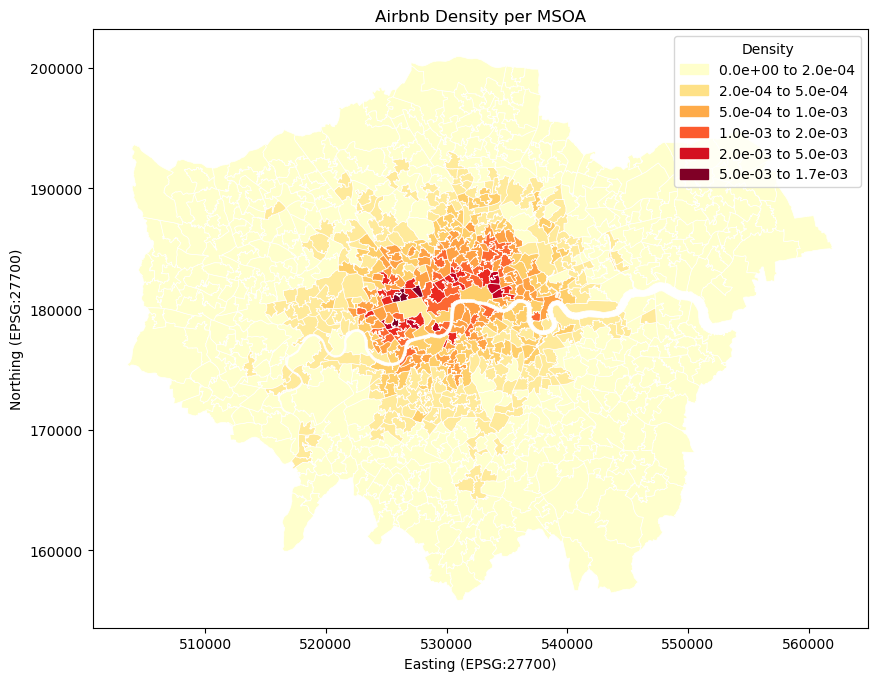

In [53]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10, 10))

def scientific_format(x, pos):
    return f"{x:.3e}" 

#Natural breakpoint method for classification
msoa_with_airbnb.plot(
    column='density',
    cmap='YlOrRd',
    scheme='natural_breaks', 
    k=8,                      
    legend=True,
    linewidth=0.5,
    edgecolor='white',
    ax=ax
)




# changing legend
bins = [0, 0.0002, 0.0005, 0.001, 0.002, 0.005, msoa_with_stats['density'].max()]
labels = [f"{b:.1e}" for b in bins]  # 转换为科学计数法格式

colors = plt.cm.YlOrRd(np.linspace(0, 1, len(bins)-1))  # 使用 colormap 生成颜色
patches = [mpatches.Patch(color=colors[i], label=f"{labels[i]} to {labels[i+1]}") 
           for i in range(len(bins)-1)]

plt.legend(
    handles=patches,
    title="Density",
    loc='upper right',
    frameon=True
)


# Changing the labelling
plt.title("Airbnb Density per MSOA")
plt.xlabel("Easting (EPSG:27700)")
plt.ylabel("Northing (EPSG:27700)")


plt.show()

In [ ]:
Join hotel data

In [118]:
hotels_with_msoa = gpd.sjoin(hotel_gdf, msoa_with_airbnb, how="inner", predicate="within")
hotel_count = hotels_with_msoa.groupby('geo_code').size().reset_index(name='hotel_count')
msoa_with_airbnb_hotels = msoa_with_airbnb.merge(hotel_count, on='geo_code', how='left')
msoa_with_airbnb_hotels['hotel_count'] = msoa_with_airbnb_hotels['hotel_count'].fillna(0)
msoa_with_airbnb_hotels['hotel_density'] = msoa_with_airbnb_hotels['hotel_count'] / msoa_with_airbnb_hotels['area_m2']


print(msoa_with_airbnb_hotels[['geo_code', 'hotel_count', 'area_m2', 'hotel_density']].head())


    geo_code  hotel_count       area_m2  hotel_density
0  E02000730          0.0  5.034109e+05   0.000000e+00
1  E02000053          0.0  1.550097e+06   0.000000e+00
2  E02000243          1.0  2.845748e+06   3.514015e-07
3  E02000793          0.0  1.326445e+06   0.000000e+00
4  E02000077          0.0  1.117333e+06   0.000000e+00


In [121]:
# Standardised formula：Min-Max Scaling
def min_max_scaling(column):
    return (column - column.min()) / (column.max() - column.min())


msoa_with_airbnb_hotels['nhotel_count'] = min_max_scaling(msoa_with_airbnb_hotels['hotel_count'])
msoa_with_airbnb_hotels['nhotel_density'] = min_max_scaling(msoa_with_airbnb_hotels['hotel_density'])


print(msoa_with_airbnb_hotels[['geo_code', 'hotel_count', 'nhotel_count', 'nhotel_density', 'hotel_density']].head())


    geo_code  hotel_count  nhotel_count  nhotel_density  hotel_density
0  E02000730          0.0      0.000000        0.000000   0.000000e+00
1  E02000053          0.0      0.000000        0.000000   0.000000e+00
2  E02000243          1.0      0.011765        0.002412   3.514015e-07
3  E02000793          0.0      0.000000        0.000000   0.000000e+00
4  E02000077          0.0      0.000000        0.000000   0.000000e+00


In [122]:
# Generating descriptive statistics
msoa_stats = msoa_with_airbnb_hotels[['airbnb_count', 'nairbnb_count', 'density', 'n_density','hotel_count', 'nhotel_count', 'nhotel_density', 'hotel_density']].describe()

print(msoa_stats)

       airbnb_count  nairbnb_count       density   n_density  hotel_count  \
count    983.000000     983.000000  9.830000e+02  983.000000   983.000000   
mean      97.845371       0.077986  1.297690e-04    0.076584     1.405900   
std      124.539112       0.101334  2.068663e-04    0.122231     5.563835   
min        2.000000       0.000000  1.552726e-07    0.000000     0.000000   
25%       23.000000       0.017087  1.295623e-05    0.007564     0.000000   
50%       53.000000       0.041497  4.525557e-05    0.026648     0.000000   
75%      127.000000       0.101709  1.589662e-04    0.093836     1.000000   
max     1231.000000       1.000000  1.692583e-03    1.000000    85.000000   

       nhotel_count  nhotel_density  hotel_density  
count    983.000000      983.000000   9.830000e+02  
mean       0.016540        0.013407   1.953306e-06  
std        0.065457        0.069378   1.010797e-05  
min        0.000000        0.000000   0.000000e+00  
25%        0.000000        0.000000   0.0

In [125]:
print(msoa_with_airbnb_hotels.head())

    geo_code                 geo_label geo_labelw  \
0  E02000730                Newham 017       None   
1  E02000053                Barnet 030       None   
2  E02000243                Ealing 006       None   
3  E02000793  Richmond upon Thames 010       None   
4  E02000077                Bexley 013       None   

                                            geometry       area_m2  \
0  MULTIPOLYGON (((540612.745 184312.782, 540611....  5.034109e+05   
1  MULTIPOLYGON (((521244.462 190052.504, 521255....  1.550097e+06   
2  MULTIPOLYGON (((513445.352 183679.664, 513446....  2.845748e+06   
3  MULTIPOLYGON (((513496.024 174051.923, 513495....  1.326445e+06   
4  MULTIPOLYGON (((546675.313 176656.042, 546675....  1.117333e+06   

   airbnb_count   density  nairbnb_count  n_density  hotel_count  \
0            27  0.000054       0.020342   0.031599          0.0   
1           202  0.000130       0.162734   0.076907          0.0   
2            43  0.000015       0.033360   0.008836     

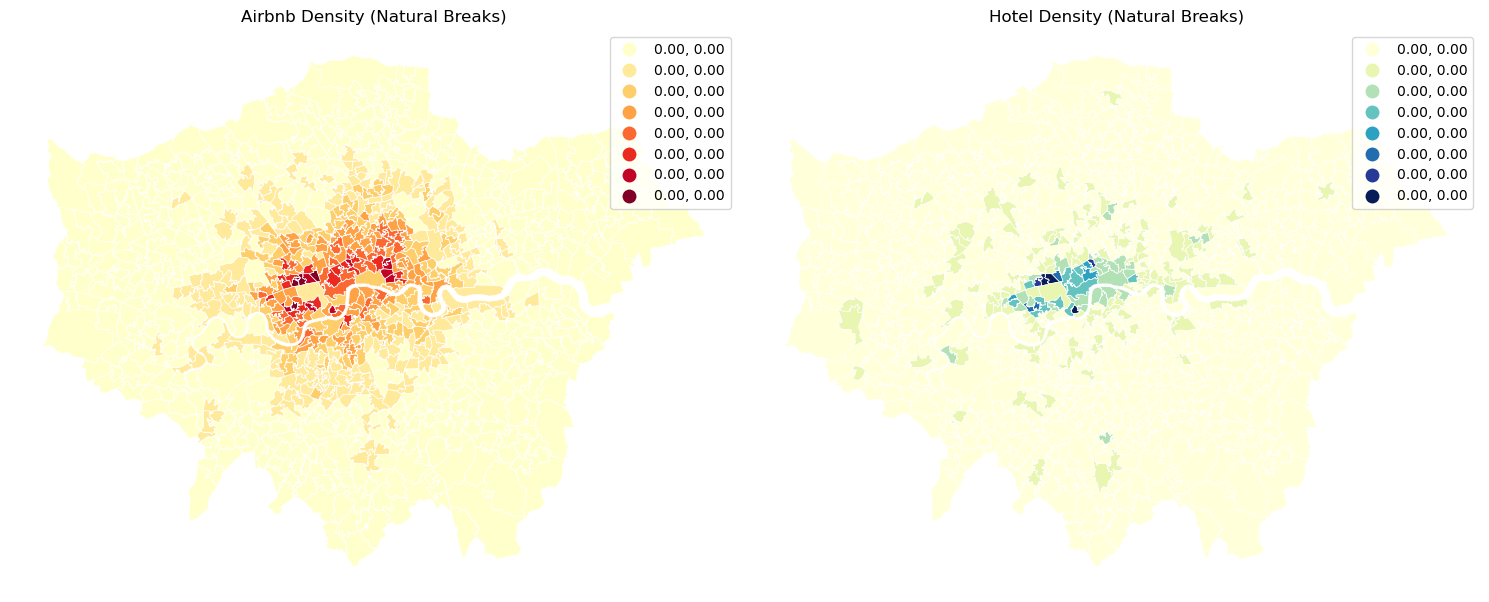

In [136]:
import matplotlib.pyplot as plt
import mapclassify as mc  # 导入 mapclassify 进行分类

# 创建一行两列的子图
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# 重新分类 density 使用自然断点法
scheme_density = mc.NaturalBreaks(msoa_with_airbnb_hotels['density'], k=8)
msoa_with_airbnb_hotels.plot(
    column='density',
    cmap='YlOrRd',
    legend=True,
    linewidth=0.5,
    edgecolor='white',
    scheme='natural_breaks',  # 使用自然断点法
    classification_kwds={'k': 8},
    ax=axes[0]
)
axes[0].set_title("Airbnb Density (Natural Breaks)")
axes[0].set_axis_off()

# 重新分类 hotel_density 使用自然断点法
scheme_hotel_density = mc.NaturalBreaks(msoa_with_airbnb_hotels['hotel_density'], k=8)
msoa_with_airbnb_hotels.plot(
    column='hotel_density',
    cmap='YlGnBu',
    legend=True,
    linewidth=0.5,
    edgecolor='white',
    scheme='natural_breaks',  # 使用自然断点法
    classification_kwds={'k': 8},
    ax=axes[1]
)
axes[1].set_title("Hotel Density (Natural Breaks)")
axes[1].set_axis_off()

# 调整布局
plt.tight_layout()
plt.show()

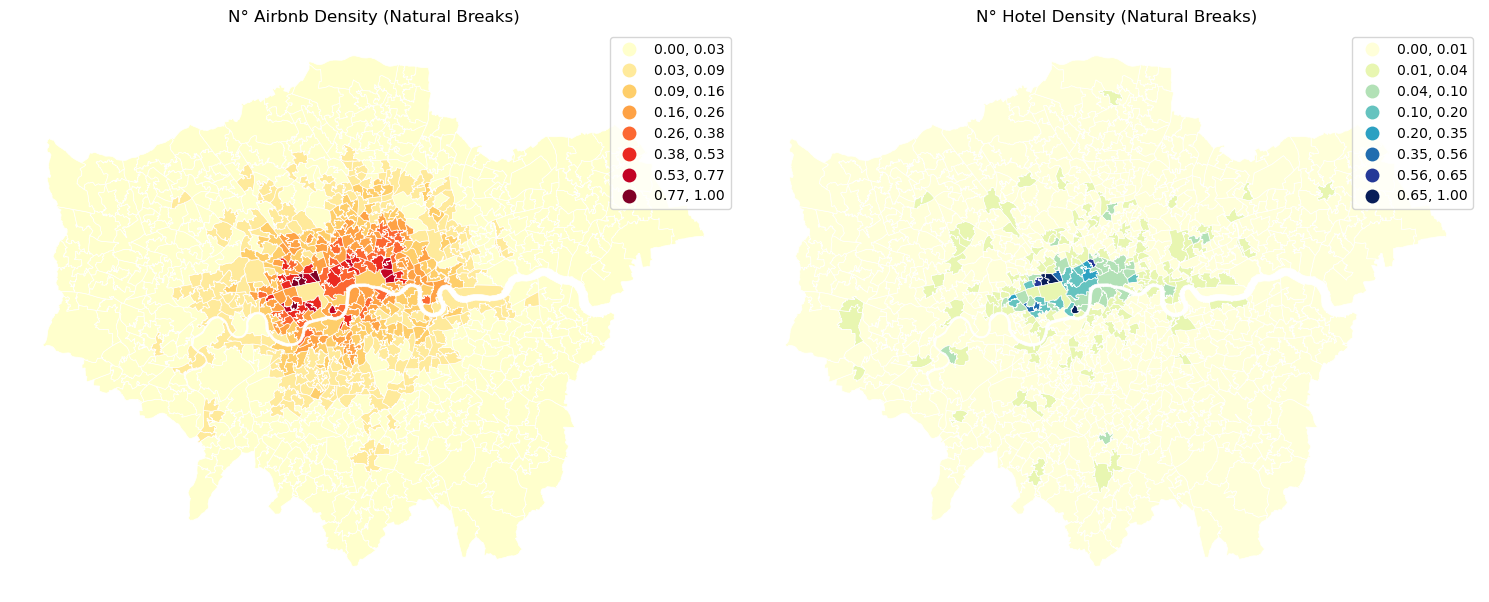

In [135]:
import matplotlib.pyplot as plt
import mapclassify as mc  # 导入 mapclassify

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

scheme_density = mc.NaturalBreaks(msoa_with_airbnb_hotels['n_density'], k=8)
msoa_with_airbnb_hotels.plot(
    column='n_density',
    cmap='YlOrRd',
    legend=True,
    linewidth=0.5,
    edgecolor='white',
    scheme='natural_breaks',
    classification_kwds={'k': 8},
    ax=axes[0]
)
axes[0].set_title("N° Airbnb Density (Natural Breaks)")
axes[0].set_axis_off()

scheme_hotel_density = mc.NaturalBreaks(msoa_with_airbnb_hotels['nhotel_density'], k=8)
msoa_with_airbnb_hotels.plot(
    column='nhotel_density',
    cmap='YlGnBu',
    legend=True,
    linewidth=0.5,
    edgecolor='white',
    scheme='natural_breaks',
    classification_kwds={'k': 8},
    ax=axes[1]
)
axes[1].set_title("N° Hotel Density (Natural Breaks)")
axes[1].set_axis_off()


plt.tight_layout()
plt.show()

Local Moran's I analysis

In [138]:
import libpysal as ps
import esda
import geopandas as gpd
import matplotlib.pyplot as plt

In [141]:
#Computational space matrix
w = ps.weights.Queen.from_dataframe(msoa_with_airbnb_hotels, use_index=True)
w.transform = 'r'

In [142]:
#Define a function that plots Local Moran's I graphs
def local_moran_analysis(gdf, column, title, ax):
    moran_loc = esda.Moran_Local(gdf[column], w)
    gdf['local_moran'] = moran_loc.Is
    gdf['p_sim'] = moran_loc.p_sim
    gdf.plot(
        column='local_moran',
        cmap='coolwarm',
        legend=True,
        linewidth=0.5,
        edgecolor='white',
        ax=ax
    )
    ax.set_title(title)
    ax.axis("off")

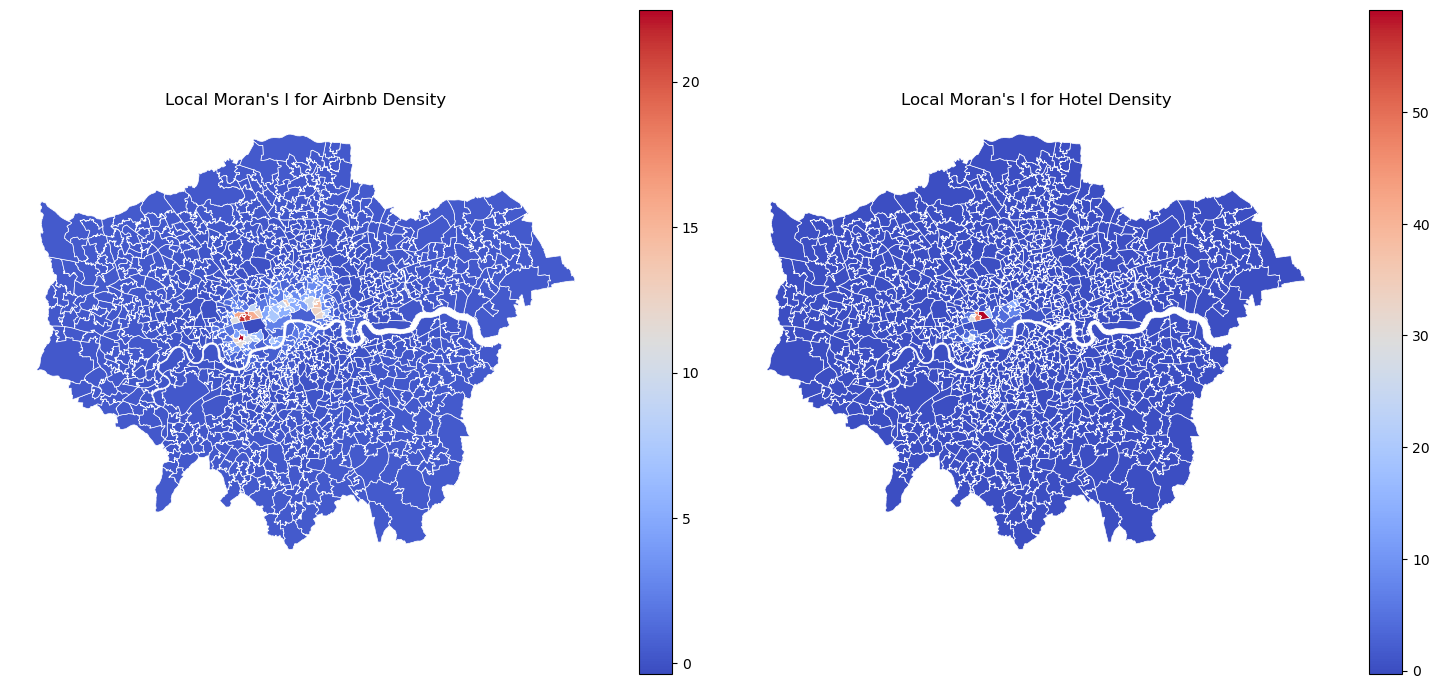

In [144]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))


# Analyse and map density indicators
local_moran_analysis(
    msoa_with_airbnb_hotels,
    column='density',
    title="Local Moran's I for Airbnb Density",
    ax=axes[0]
)

# Analyse and map hotel_density indicators
local_moran_analysis(
    msoa_with_airbnb_hotels,
    column='hotel_density',
    title="Local Moran's I for Hotel Density",
    ax=axes[1]
)


#layout
plt.tight_layout()
plt.show()


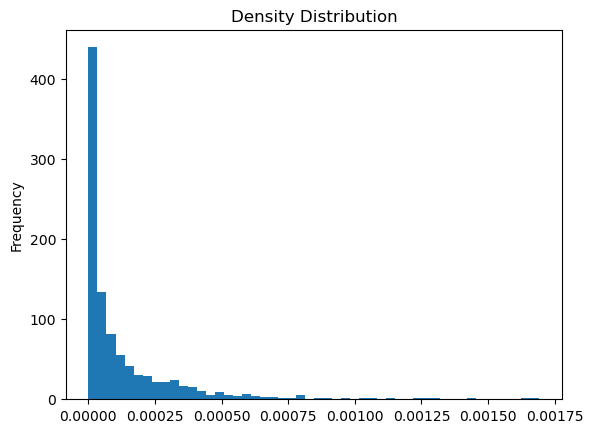

In [151]:
msoa_with_airbnb_hotels['density'].plot.hist(title="Density Distribution", bins=50)
plt.show()

In [161]:
def recompute_lisa(gdf, column, output_column, significance=0.05):
    """
    重新计算 Local Moran's I 并将结果保存到指定列。
    参数:
        gdf: GeoDataFrame
        column: 进行 LISA 计算的列名
        output_column: 保存四象限分类结果的列名
        significance: 显著性水平
    """
    gdf = gdf.copy()  # 避免修改原始数据
    from scipy.stats import zscore
    
    # 标准化变量（z-score）
    gdf['z_value'] = zscore(gdf[column])
    
    # 计算 Local Moran's I
    moran_loc = esda.Moran_Local(gdf[column], w)
    
    # 初始化分类
    gdf['local_moran'] = moran_loc.Is
    gdf['p_sim'] = moran_loc.p_sim
    gdf[output_column] = 0  # 非显著区域初始化为0

    # 四象限分类逻辑
    sig = gdf['p_sim'] < significance  # 显著性检验
    high = gdf['z_value'] > 0          # 高值区
    low = ~high                        # 低值区

    gdf.loc[sig & high & (moran_loc.z_sim > 0), output_column] = 1  # HH (High-High)
    gdf.loc[sig & low & (moran_loc.z_sim < 0), output_column] = 2  # LL (Low-Low)
    gdf.loc[sig & high & (moran_loc.z_sim < 0), output_column] = 3  # HL (High-Low)
    gdf.loc[sig & low & (moran_loc.z_sim > 0), output_column] = 4  # LH (Low-High)

    return gdf


In [162]:
# 重新计算 Local Moran's I 并保存到不同列
msoa_with_airbnb_hotels = recompute_lisa(
    gdf=msoa_with_airbnb_hotels,
    column='density',
    output_column='quadrant_density',
    significance=0.05
)

msoa_with_airbnb_hotels = recompute_lisa(
    gdf=msoa_with_airbnb_hotels,
    column='hotel_density',
    output_column='quadrant_hotel_density',
    significance=0.05
)

# 查看结果
print(msoa_with_airbnb_hotels[['geo_code', 'quadrant_density', 'quadrant_hotel_density']].head())


    geo_code  quadrant_density  quadrant_hotel_density
0  E02000730                 0                       0
1  E02000053                 0                       0
2  E02000243                 4                       0
3  E02000793                 0                       0
4  E02000077                 4                       0


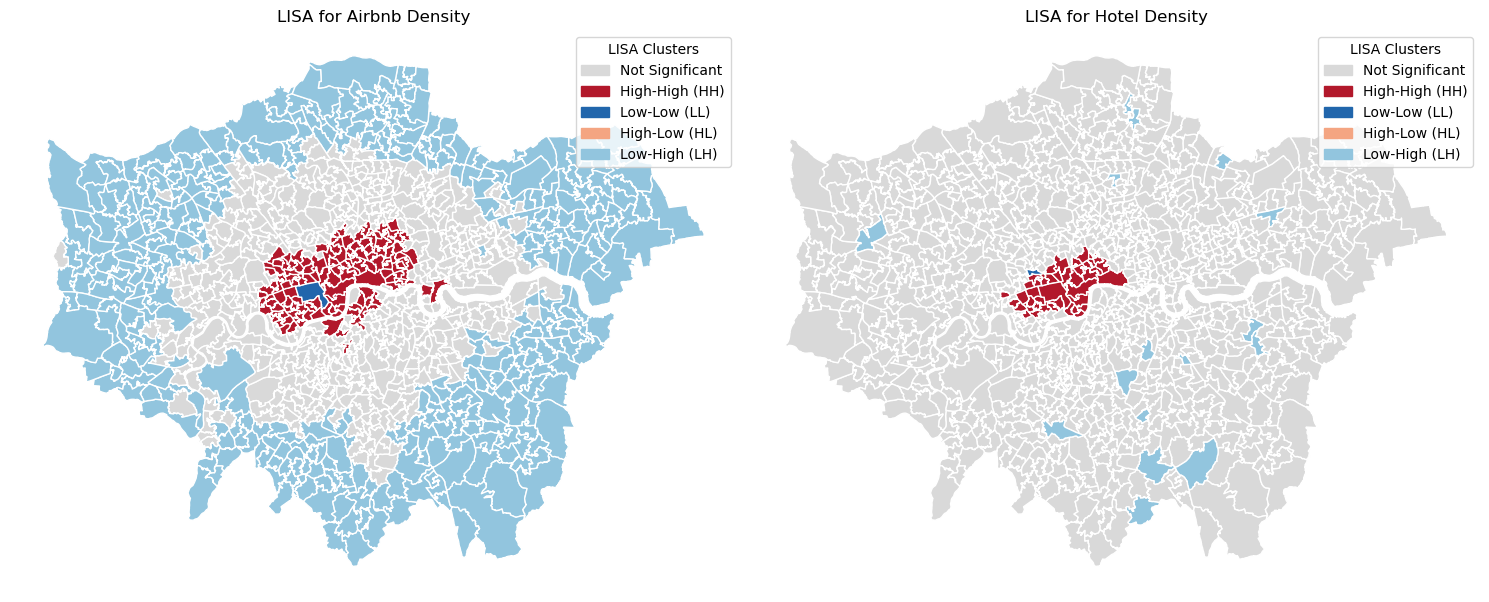

In [163]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 定义颜色映射和标签
cmap = {
    0: '#d9d9d9',  # Non-significant: 灰色
    1: '#b2182b',  # HH (High-High): 红色
    2: '#2166ac',  # LL (Low-Low): 蓝色
    3: '#f4a582',  # HL (High-Low): 橙色
    4: '#92c5de'   # LH (Low-High): 淡蓝色
}
labels = {
    0: 'Not Significant',
    1: 'High-High (HH)',
    2: 'Low-Low (LL)',
    3: 'High-Low (HL)',
    4: 'Low-High (LH)'
}

# 绘图函数
def plot_quadrants(gdf, column, title, ax):
    # 映射颜色
    gdf['color'] = gdf[column].map(cmap)
    
    # 绘制地图
    gdf.plot(color=gdf['color'], edgecolor='white', ax=ax)
    ax.set_title(title, fontsize=12)
    ax.axis("off")
    
    # 添加手动图例
    patches = [mpatches.Patch(color=cmap[i], label=labels[i]) for i in cmap.keys()]
    ax.legend(handles=patches, loc='upper right', title="LISA Clusters")

# 创建一行两列的子图
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# 绘制 quadrant_density 图
plot_quadrants(msoa_with_airbnb_hotels, 'quadrant_density', "LISA for Airbnb Density", axes[0])

# 绘制 quadrant_hotel_density 图
plot_quadrants(msoa_with_airbnb_hotels, 'quadrant_hotel_density', "LISA for Hotel Density", axes[1])

# 调整布局
plt.tight_layout()
plt.show()
